# Loading Part 1: Into & 1D Data

This notebook is designed to guide you through the process of loading, cleaning, formatting, and processing data, a common task in aerosol research. You'll learn how to automate these repetitive tasks using Python scripts, specifically leveraging the functionalities of the `particula.data` package. This will streamline your data handling process, making your research more efficient.


## Setting the Working Path

The first step in data processing is to set the working path where your data files are located. In this example, we'll use example data from the data/examples directory. However, you can easily adapt this to point to any directory on your computer.

For instance, if you have a data folder in your home directory, you might set the path like this:
`path = "U:\\data\\processing\\Campaign2023_of_awesome\\data"`

This flexibility allows you to work with data stored in different locations on your computer.

### Importing Packages

Before we get started, we need to import the packages we'll be using.


In [2]:

import os  # For handling file paths and directories
import matplotlib.pyplot as plt  # For plotting data

# Importing specific functions from the particula package for data loading
# and handling
from particula.data import loader, loader_interface
from particula.data.tests.example_data.get_example_data import get_data_folder
from particula.data.loader_setting_builders import (
    DataChecksBuilder,
    Loader1DSettingsBuilder,
)

In [3]:
# Setting up the path for data files
import os  # Re-importing os for clarity
from particula.data.tests.example_data.get_example_data import get_data_folder

current_path = os.getcwd()  # Getting the current working directory
print('Current path for this script:')
print(current_path.rsplit('particula')[-1])  # Displaying the current path

path = get_data_folder()  # Getting the example data folder path
print('Path to data folder:')
print(path.rsplit('particula')[-1])  # Displaying the data folder path

Current path for this script:
\docs\examples\streamlake\notebooks
Path to data folder:
\data\tests\example_data


## Loading the Data

With the working directory set, we're ready to load the data. For this task, we'll use the `loader` module from the `particula` package. The `loader.data_raw_loader()` function allows us to easily load data files by providing the file path. This simplifies the initial step of any data analysis process, especially for those new to Python.


In [4]:
data_file = os.path.join(
    path,
    'CPC_3010_data',
    'CPC_3010_data_20220709_Jul.csv')

# load the data
raw_data = loader.data_raw_loader(data_file)

# print the first 2 rows
print(raw_data[:2])

['1657342801,32660,17.1,', '1,0.017']


## Clean Up Data

To facilitate data cleaning, we utilize `loader.data_format_checks`. This function performs a series of checks on the data, ensuring it meets specified criteria. The checks include:

- `characters`: Validates the minimum and maximum number of characters in each data line, ensuring data integrity and uniformity.
- `char_counts`: Counts the occurrences of specific characters in each line. This is defined in a dictionary, with characters as keys and their expected counts as values.
- `skip_rows`: Specifies the number of rows to skip at the beginning of the file, useful for bypassing headers or non-data lines.
- `skip_end`: Determines the number of rows to omit at the end of the file, often used to avoid reading summary or footer information.

After performing these checks, the function returns a list of data that has passed all the criteria. This cleaned data is then ready for further analysis or processing.

In [5]:
# Printing the length of raw_data before cleaning
print(f"raw_data length: {len(raw_data)}")

# This function needs Data checks dict for:
# - characters: Ensures each line has between 10 and 100 characters
# - char_counts: Checks that each line contains 4 commas (this is customizable)
# - skip_rows: Number of rows to skip at the start (none in this case)
# - skip_end: Number of rows to skip at the end (none in this case)
# This can be built using the DataChecksBuilder class
data_checks = (
    DataChecksBuilder()
    .set_characters([10, 100])
    .set_char_counts({",": 4})
    .set_skip_rows(0)
    .set_skip_end(0)
    .build()
)
print(f"data checks: {data_checks}")

# Cleaning the data using loader.data_format_checks
data = loader.data_format_checks(
    data=raw_data,
    data_checks=data_checks
)

# Printing the length of data after cleaning
print(f"data length: {len(data)}")

# Calculating and printing the number of lines removed during the cleaning
# process
print(f"There was {len(raw_data) - len(data)} lines removed from the data")

# Note: The data cleaning is performed by the general_data_formatter function for timeseries data.
# If dealing with 2D data, a separate function is used for cleaning.

raw_data length: 33280
data checks: {'characters': [10, 100], 'char_counts': {',': 4}, 'skip_rows': 0, 'skip_end': 0}
data length: 33254
There was 26 lines removed from the data


## Data and Time

Once the data is cleaned, the next crucial step is extracting and standardizing the time and data columns. This process is particularly important because time data can come in many formats, and standardizing it to a single format, like epoch time, facilitates analysis and comparison. Epoch time, also known as Unix time, is a system for describing points in time as the number of seconds elapsed since January 1, 1970. It's a widely used standard in computing and data processing.

To handle the conversion and extraction of time and data, we use the `loader.sample_data()` function. This function is designed to:

1. **Identify and Extract Time Data**: It locates the time information within the dataset, which can be in various formats such as ISO 8601, DD/MM/YYYY, MM/DD/YYYY, etc.
2. **Convert to Epoch Time**: It standardizes the extracted time data to epoch time. This conversion is crucial because epoch time provides a consistent reference for time data, making it easier to perform time-based calculations and comparisons.
3. **Separate Data Columns**: Along with time data, it also segregates other data columns for further analysis.

By using `loader.sample_data()` to convert various time formats to epoch time and separate the data columns, we effectively prepare our dataset for robust and error-free analysis. This approach is essential in research and data science, where dealing with multiple time formats is a common challenge.

In [6]:
# Sample the data to get the epoch times and the data
epoch_time, data_array = loader.sample_data(
    data=data,
    time_column=[0],  # Indicate the column(s) that contain time data.
                      # For instance, if time data spans multiple columns,
                      # list them here, like [0, 2] for columns 0 and 2.
    time_format="epoch",  # Define the format of the time data.
                          # Use "epoch" for epoch time, or specify another format
                          # compatible with datetime.strptime(), such as
                          # "%m/%d/%Y %I:%M:%S %p".
    # Specify columns that contain the actual data for analysis.
    data_columns=[1, 2],
    # Indicate the delimiter used in the data (e.g., comma for CSV files).
    delimiter=",",
)

# Printing the shape and first few entries of the epoch time array
print(f"epoch_time shape: {epoch_time.shape}")
print("First 5 epoch times:", epoch_time[:5])

# Printing the shape and first few entries of the data array
print(f"data_array shape: {data_array.shape}")
print("First 5 data entries:", data_array[:5])

epoch_time shape: (33254,)
First 5 epoch times: [1.65734280e+09 1.65734281e+09 1.65734281e+09 1.65734281e+09
 1.65734282e+09]
data_array shape: (33254, 2)
First 5 data entries: [[3.3510e+04 1.7000e+01]
 [3.3465e+04 1.7100e+01]
 [3.2171e+04 1.7000e+01]
 [3.2889e+04 1.6800e+01]
 [3.2706e+04 1.7000e+01]]


## Pause to Plot: Verifying Data Integrity

After successfully importing the data and converting time information, it's crucial to pause and visually inspect our dataset. Plotting the data serves as an essential checkpoint to verify that the import process has been executed correctly. This step is vital for several reasons:

1. **Data Integrity Check**: Visualizing the data helps in quickly identifying any anomalies or irregularities that might indicate issues in the data import or cleaning processes.

2. **Understanding Data Structure**: A plot can provide immediate insights into the nature and structure of the dataset, such as trends, patterns, and outliers.

3. **Ensuring Accuracy**: Before proceeding to more complex analyses or modeling, confirming the accuracy of the data through visualization is a fundamental best practice.

In this section, we will create a simple plot to examine our time series data, ensuring that the time conversion and data import have been performed correctly.


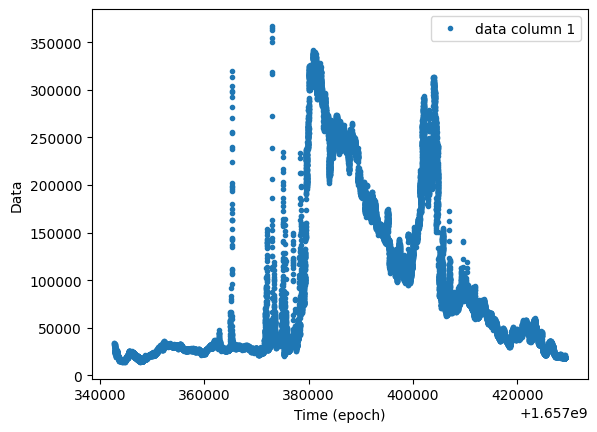

In [7]:
# Creating a figure and axis for the plot
fig, ax = plt.subplots()

# Plotting the data
# `epoch_time` on the x-axis and the first column of `data_array` on the y-axis
ax.plot(epoch_time,
        data_array[:, 0],  # Selecting the first column of data_array
        label="data column 1",  # Label for this data series
        linestyle="none",  # No line connecting the data points
        marker=".")  # Style of the data points; here, it's a dot

# Setting the x-axis label to "Time (epoch)"
ax.set_xlabel("Time (epoch)")

# Setting the y-axis label to "Data"
ax.set_ylabel("Data")

# Adding a legend to the plot, which helps identify the data series
ax.legend()

# Displaying the plot
plt.show()

# Adjusting the layout to make sure everything fits well within the figure
# This is particularly useful for ensuring labels and titles are not cut off
fig.tight_layout()

## Stream Object: Streamlining Your Analysis

Once you have the cleaned and formatted data, you might find yourself repeatedly using the same code to analyze different datasets. To avoid the tedium of copying and pasting the same code, we can utilize the `Stream` object provided by the `loader` module. The `Stream` object allows for more automated and efficient analysis, significantly simplifying repetitive tasks.

The `Stream` object requires a settings dictionary that encapsulates all necessary parameters for data loading. Below, we'll explore how to create this settings dictionary and use it to initialize a `Stream` object.

### Settings Dictionary: Centralizing Data Loading Parameters

The settings dictionary is a crucial component in the data loading process. It consolidates all the necessary settings for loading your data into a single, easily manageable structure. This includes parameters for data checks, specification of time and data columns, as well as the time format.

There are two primary methods to generate this settings dictionary:

1. **Using `LoaderSetting1DBuilder`**: This is a builder class that simplifies the creation of the settings dictionary. It provides a structured approach to defining the settings, ensuring that all required parameters are included. This method is particularly useful for beginners or those looking for a more guided approach.

2. **Manual Creation**: Alternatively, you can manually construct the settings dictionary. This might involve writing the dictionary from scratch or modifying one generated by the `settings_generator` module. Manual creation offers more flexibility and is particularly useful if your data loading requirements are unique or complex.

In the next steps, we will demonstrate how to use the settings dictionary for loading data into a `Stream` object.

In [8]:
# Using the LoaderSetting1DBuilder class to generate the settings dictionary

settings = (
    Loader1DSettingsBuilder()
    .set_relative_data_folder("CPC_3010_data")
    .set_filename_regex("*.csv")
    .set_header_row(0)
    .set_data_checks(data_checks)  # from above
    .set_data_column([1, 2])
    .set_data_header(["data 1", "data 2"])
    .set_time_column([0])
    .set_time_format("epoch")
    .set_delimiter(",")
    .set_timezone_identifier("UTC")
    .build()
)

# Printing the generated settings dictionary to verify its contents
print('Settings dictionary:')
for key, value in settings.items():
    print(f'{key}: {value}')

Settings dictionary:
relative_data_folder: CPC_3010_data
filename_regex: *.csv
MIN_SIZE_BYTES: 10000
data_loading_function: general_1d_load
header_row: 0
data_checks: {'characters': [10, 100], 'char_counts': {',': 4}, 'skip_rows': 0, 'skip_end': 0}
data_column: [1, 2]
data_header: ['data 1', 'data 2']
time_column: [0]
time_format: epoch
delimiter: ,
time_shift_seconds: 0
timezone_identifier: UTC


## Load the Data with the Interface

With our settings dictionary in hand, we can now streamline the data loading process using a specialized interface. This interface acts as a bridge between our predefined settings and the actual data loading steps. It essentially automates the sequence of actions we performed manually earlier, like data cleaning and formatting, based on the parameters specified in the settings dictionary.

By utilizing this interface, we can efficiently load our data with a few lines of code, ensuring consistency and accuracy. This approach is particularly beneficial when dealing with multiple datasets or when needing to replicate the same data processing steps in different projects.

The interface function we'll use is designed to accept the settings dictionary and the location of the data. It then internally calls the necessary functions to execute the data loading process. This includes:

- Reading the data files based on the specified filename patterns and folder locations.
- Performing data checks and cleaning as defined in the settings.
- Extracting and formatting time and data columns according to our requirements.

This method significantly simplifies the data loading process, reducing the potential for errors and increasing efficiency.

In [9]:
# Importing the loader interface from the particula package
from particula.data import loader_interface
from particula.data.tests.example_data.get_example_data import get_data_folder

# Getting the working path where the data files are located
working_path = get_data_folder()

# Defining the settings for loading CPC 3010 data
# These settings were previously generated or can be created manually
cpc_settings = {
    # Folder name containing the data files
    'relative_data_folder': 'CPC_3010_data',
    # Pattern to match filenames (e.g., all CSV files)
    'filename_regex': '*.csv',
    'header_row': 0,  # Row number of the header in the data file
    'MIN_SIZE_BYTES': 10,  # Minimum file size in bytes for a file to be considered
    # Function to be used for loading the data
    'data_loading_function': 'general_1d_load',
    'header_row': 0,  # Row number of the header in the data file
    'data_checks': {
        # Range of character count per line (min, max)
        'characters': [10, 100],
        # Number of times a character (comma) should appear in each line
        'char_counts': {',': 4},
        'skip_rows': 0,  # Number of rows to skip at the beginning of the file
        'skip_end': 0  # Number of rows to skip at the end of the file
    },
    'data_column': [1, 2],  # Columns in the file that contain the data
    'data_header': ['data 1', 'data 2'],  # Headers for the data columns
    'time_column': [0],  # Column in the file that contains the time data
    'time_format': 'epoch',  # Format of the time data (epoch, ISO 8601, etc.)
    'delimiter': ',',  # Delimiter used in the data file (e.g., comma for CSV)
    'time_shift_seconds': 0,  # Shift in time data if needed, in seconds
    'timezone_identifier': 'UTC'  # Timezone identifier for the time data
}

# Now call the loader interface to load the data using the specified settings
data_stream = loader_interface.load_files_interface(
    path=working_path,  # Path to the data folder
    settings=cpc_settings,  # Settings defined above
)

# The data_stream object now contains the loaded and formatted data ready
# for analysis

  Loading file: CPC_3010_data_20220709_Jul.csv
  Loading file: CPC_3010_data_20220710_Jul.csv


# Exploring the Stream Class in Particula

The `Stream` class in the Particula package is a sophisticated tool for data management, akin to a well-organized filing cabinet for your data. Let's dive into its features and functionalities to understand how it can streamline your data analysis tasks.

## Key Features of the Stream Class

- **Header**: Just as labels on filing cabinet drawers help you identify contents, the `header` in `Stream` serves a similar purpose. It's a list of strings that represent the column names of your data, guiding you to understand what each column in your dataset signifies.

- **Data**: Imagine each drawer in a filing cabinet filled with files; `data` in `Stream` is akin to this. It's a numpy array containing your dataset, neatly organized where each row represents a point in time and each column corresponds to one of the headers.

- **Time**: Like time tags on files that show when they were recorded, the `time` attribute in `Stream` keeps a chronological record of each data entry. It’s a numpy array that represents the time dimension of your data, correlating each row in the `data` array with a specific moment.

- **Files**: Similar to having a list that tells you about all the folders inside a filing cabinet, `files` in `Stream` reveals the names of all the data files that comprise your data stream. This list of strings provides a clear trace back to the original data sources.

## Functionalities and Tools

- **validate_inputs**: This function acts like a checklist ensuring all your files are correctly formatted before being placed in the cabinet. In `Stream`, it checks the validity of header, data, and time inputs, ensuring everything is in order for smooth data handling.

- **datetime64**: Think of it as a tool that standardizes the dates and times on your documents into a uniform format (datetime64), making them easier to understand and use, particularly for plotting and time-based operations.

- **return_header_dict**: It’s like having a quick reference guide in your filing cabinet, telling you exactly where to find data corresponding to each label (header). In `Stream`, it offers a dictionary mapping header elements to their indices in the data array, simplifying data access.

## Practical Application

For beginners and experienced users alike, the Stream class in Particula package is your organized, efficient data manager. It takes the complexity out of data handling, allowing you to focus more on insightful analysis and less on the intricacies of data organization.


In [10]:
# Example 1: Print the Headers of the Data Stream
print("Headers of the Data Stream:")
print(data_stream.header)

# Example 2: Display the First Few Rows of Data
print("\nFirst 5 Rows of Data:")
print(data_stream.data[:5, :])

# Example 3: Print the Time Stamps Associated with the First Few Data Entries
print("\nTime Stamps for the First 5 Data Entries:")
print(data_stream.time[:5])

# Example 4: Retrieve and Print Data from a Specific Column using Header Name
column_name = 'data 1'  # Replace with an actual column name from your header
print(f"\n5 Entries from data Column '{column_name}':")
print(data_stream[column_name][:5])

# Example 5: Print the Length of the Time Stream (Number of Data Entries)
print("\nNumber of Data Entries in the Time Stream:")
print(len(data_stream))

# Example 6: Convert Time to datetime64 and Print the First Few Entries
print("\nFirst 5 Time Entries in datetime64 Format:")
print(data_stream.datetime64[:5])

# Example 7: Print the Names of the Source Files
print("\nNames of the Source Files for the Data Stream:")
print(data_stream.files)

Headers of the Data Stream:
['data 1', 'data 2']

First 5 Rows of Data:
[[3.3510e+04 1.7000e+01]
 [3.3465e+04 1.7100e+01]
 [3.2171e+04 1.7000e+01]
 [3.2889e+04 1.6800e+01]
 [3.2706e+04 1.7000e+01]]

Time Stamps for the First 5 Data Entries:
[1.65734280e+09 1.65734281e+09 1.65734281e+09 1.65734281e+09
 1.65734282e+09]

5 Entries from data Column 'data 1':
[33510. 33465. 32171. 32889. 32706.]

Number of Data Entries in the Time Stream:
68551

First 5 Time Entries in datetime64 Format:
['2022-07-09T05:00:04' '2022-07-09T05:00:07' '2022-07-09T05:00:10'
 '2022-07-09T05:00:13' '2022-07-09T05:00:16']

Names of the Source Files for the Data Stream:
[['CPC_3010_data_20220709_Jul.csv', 1044534], ['CPC_3010_data_20220710_Jul.csv', 1113488]]


# Plotting Data Using the Stream Object

Visualizing your data is a crucial step in understanding its patterns and behavior. With the `data_stream` object from the Particula package, plotting time-series data becomes straightforward and efficient. Here's how you can use `data_stream` for plotting:

1. **Preparing the Plot**: Start by creating a figure and an axis using `matplotlib`'s `plt.subplots()`. This sets up the canvas on which you'll draw your plot.

2. **Plotting Time-Series Data**:
   - The `data_stream.datetime64` provides time data in a format that is ideal for plotting on the x-axis.
   - Since `data_stream.data` is a 2D array (where rows correspond to time and columns to different data types), you need to specify which column you want to plot. For example, `data_stream.data[:, 0]` plots the first column of data.

3. **Customizing the Plot**:
   - Add labels to your plot for clarity. The `label` parameter in the `ax.plot` function can be used to name the data series being plotted.
   - Customize the appearance of your plot. In this example, we use `linestyle="none"` and `marker="."` to plot individual data points without connecting lines.

4. **Adjusting Axes and Display**:
   - The `plt.tick_params` function allows you to rotate the x-axis labels, making them easier to read, especially for densely plotted data.
   - Set the x-axis and y-axis labels using `ax.set_xlabel` and `ax.set_ylabel` to provide context to your plot.

5. **Final Touches**:
   - Include a legend by calling `ax.legend()`. This is particularly useful when plotting multiple data series.
   - Use `plt.show()` to display the plot.
   - The `fig.tight_layout()` ensures that the layout of the plot is adjusted so that all elements (like labels and titles) are clearly visible.

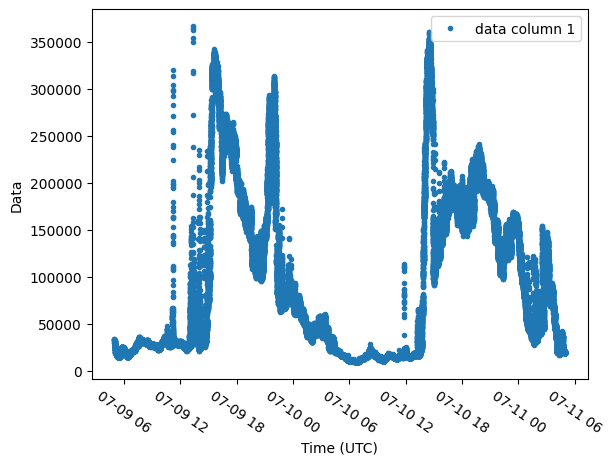

In [11]:
# Importing the matplotlib library for plotting
import matplotlib.pyplot as plt

# Creating a new figure and axis for the plot
fig, ax = plt.subplots()

# Plotting data from the data_stream object
# data_stream.datetime64 is used for the x-axis (time data)
# data_stream.data[:, 0] selects the first column of data for the y-axis
ax.plot(data_stream.datetime64,
        data_stream.data[:, 0],  # Selecting the first column of data
        label="data column 1",  # Label for the plotted data series
        linestyle="none",  # No line connecting the data points
        marker=".")  # Style of the data points; here, it's a dot

# Adjusting the x-axis labels for better readability
# Rotating the labels by -35 degrees
plt.tick_params(rotation=-35, axis='x')

# Setting the labels for the x-axis and y-axis
ax.set_xlabel("Time (UTC)")  # Label for the x-axis
ax.set_ylabel("Data")  # Label for the y-axis

# Adding a legend to the plot
# This helps in identifying the data series
ax.legend()

# Displaying the plot
plt.show()

# Adjusting the layout of the plot
# Ensures that all elements of the plot are nicely fitted within the figure
fig.tight_layout()

# Summary

In this section, we explored a comprehensive approach to handling data using the functionalities provided by the Particula package. Key takeaways include:

1. **Data Loading and Cleaning**: We began by loading data from files, emphasizing the importance of automating the cleaning process. This step involved removing errors, handling missing values, and ensuring the data is in a consistent format, which is crucial for accurate analysis.

2. **Using the Settings Dictionary**: A significant part of the process was the creation of a settings dictionary. This dictionary serves as a blueprint for the data loading process, specifying parameters like data checks, column information, and time formatting. This approach is particularly effective when working with large datasets or needing to replicate data processing steps across various projects.

3. **Streamlining with the Stream Object**: We introduced the `Stream` object, a powerful tool for organizing and processing data streams. The `Stream` object allows for efficient data manipulation, storage, and retrieval, making it an invaluable resource for handling complex or voluminous datasets.

4. **Simplifying Repetitive Tasks**: By automating data loading and cleaning through the `Stream` object and settings dictionary, we significantly reduced the redundancy of repetitive tasks. This method proves beneficial in projects where data from multiple files needs to be loaded and combined into a single, manageable unit.

5. **Visualization and Analysis**: Finally, we demonstrated how to plot the data using `matplotlib`, a crucial step for visually inspecting the data and ensuring its integrity post-import. This visual check is vital for confirming that the import process has been executed correctly and the data is ready for further analysis.

In conclusion, this section provided a solid foundation for efficiently managing and processing data in Python, setting the stage for more advanced analysis and applications in future sections.



### Bonus: Utilizing Python's Help Function

One of Python's most useful built-in functions for learners and developers alike is the `help` function. It provides detailed information about objects, functions, modules, and more, directly within your Python environment. This can be particularly helpful when exploring new libraries or understanding the functionalities of different components in your code.

#### How to Use the Help Function

The `help` function can be invoked directly in your Python code or interactive session. Simply pass the object or function you're curious about as an argument to `help()`, and it will display documentation including descriptions, available methods, attributes, and other relevant details.

For example, to learn more about the `data_stream` object we've been working with, you can use:

```python
help(data_stream)
```

This command will display information about the Stream class, including its methods, attributes, and how to use them.

#### Applying Help to Explore Functionality

You can use help with any object or function in Python. For instance, if you want to understand more about a function from the Particula package or even a built-in Python function, simply pass it to help(). Here's how you can use it:

To explore a module: help(particula)
To learn about a specific function: help(particula.some_function)
To understand an object you created: help(my_object)
Enhancing Learning and Troubleshooting
Using the help function is an excellent habit to develop. It enhances your learning process by providing immediate access to documentation. It's also a valuable tool for troubleshooting and understanding the functionalities of different components in your code.

Remember, the help function is always there to assist you, making it a bit easier to navigate the extensive world of Python programming.

In [12]:
# call help on data_stream to see the available methods
help(data_stream)

Help on Stream in module particula.data.stream object:

class Stream(builtins.object)
 |  Stream(header: List[str] = <factory>, data: numpy.ndarray[typing.Any, numpy.dtype[numpy.float64]] = <factory>, time: numpy.ndarray[typing.Any, numpy.dtype[numpy.float64]] = <factory>, files: List[str] = <factory>) -> None
 |  
 |  Consistent format for storing data.
 |  
 |  Represents a consistent format for storing and managing data streams
 |  within a list. Similar to pandas but with tighter control over the
 |  data allowed and expected format.
 |  
 |  Attributes:
 |      header: Headers of the data stream, each a string.
 |      data: 2D numpy array where rows are timepoints and columns
 |          correspond to headers.
 |      time: 1D numpy array representing the time points of the data stream.
 |      files: List of filenames that contain the data stream.
 |  
 |  Methods:
 |      validate_inputs: Validates the types of class inputs.
 |      __getitem__(index): Returns the data at the s